# Ekman spiral derivation
Upon Reynolds-averaging, the primitive equations for the atmosphere can be written as

$$ \frac{\partial u}{\partial t} + u_i \frac{\partial u}{\partial x_i} - fv = -\frac{1}{\rho}\frac{\partial P}{\partial x} - \frac{\partial \overline{u'u'}}{\partial x} - \frac{\partial \overline{u'v'}}{\partial y} - \frac{\partial \overline{u'w'}}{\partial z} $$
$$ \frac{\partial v}{\partial t} + u_i \frac{\partial v}{\partial x_i} + fu = -\frac{1}{\rho}\frac{\partial P}{\partial y}  - \frac{\partial \overline{v'u'}}{\partial x} - \frac{\partial \overline{v'v'}}{\partial y} - \frac{\partial \overline{v'w'}}{\partial z} $$

If we neglect large-scale advection and subsidence and assume stationarity, the first two terms cancel. The pressure gradient term can be eliminated by substituting the expressions for geostropich balance,

$$ fv_g = \frac{1}{\rho}\frac{\partial P}{\partial x} $$
$$ -fu_g = \frac{1}{\rho}\frac{\partial P}{\partial y} $$

Finally, we assume that the momentum fluxes in the last terms can be approximated with first order closure, 

$$ \overline{u'w'} = - K \frac{\partial u}{\partial z}$$
$$ \overline{v'w'} = - K \frac{\partial v}{\partial z}$$

We could do likewise for the horizontal fluxes, but considering that horizontal gradients are generally small compared to vertical gradients, we also discard these terms. This leaves us with

$$ -fv = -fv_g + \frac{\partial}{\partial z} \left(K \frac{\partial u}{\partial z}\right)$$
$$ fu = fu_g + \frac{\partial}{\partial z} \left(K \frac{\partial v}{\partial z}\right)$$

We can rewrite this as

$$ -f(v-v_g) = \frac{\partial}{\partial z} \left(K \frac{\partial u}{\partial z}\right)$$
$$ f(u-u_g) = \frac{\partial}{\partial z} \left(K \frac{\partial v}{\partial z}\right)$$

These coupled equations define the Ekman spiral. If K would be constant, the expressions are somewhat simplified

$$ K\frac{\partial^2u}{\partial z^2} = -f(v-v_g) $$
$$ K\frac{\partial^2v}{\partial z^2} = f(u-u_g) $$

An analytical solution for this system can be found by defining a complex velocity $ W = u + iv $, such that the two equations can be combined into one. To this end, the meridional equation is multiplied by $i = \sqrt{-1}$ and subsequently added to the lateral equation:

$$ iK\frac{\partial^2v}{\partial z^2} = if(u-u_g) $$
$$ K\frac{\partial^2u}{\partial z^2}+iK\frac{\partial^2v}{\partial z^2} = -f(v-v_g) + if(u-u_g) $$
$$ K\frac{\partial^2W}{\partial z^2} = if(u+iv) - if(u_g-iv_g)$$
$$ \frac{\partial^2W}{\partial z^2} - \frac{if}{K}W + \frac{if}{K}W_g = 0$$

This is an inhomogeneous, second order differential equation, which can be solved in two steps. First, we find a particular integral, by realizing that one solution to the problem would be that z is independent of height. This solution is given by

$$  \frac{if}{K}W = \frac{if}{K}W_g $$

from which it follows that $ W = W_g $. Then the homogeneous part of the differential equation is solved by substituting a trial solution of the form $W(z) = A \exp(\lambda z)$, which gives:

$$ \frac{\partial^2W}{\partial z^2} = \frac{if}{K}W $$
$$ \lambda^2 A \exp(\lambda z) = \frac{if}{K} A \exp(\lambda z) $$
$$ \lambda^2 = \frac{if}{K} $$
$$ \lambda = \pm \sqrt{\frac{if}{K}} $$
$$ \lambda = \pm (1+i)\sqrt{\frac{f}{2K}} = \pm (1+i) \gamma $$

where $ \sqrt{i} = \frac{1+i}{\sqrt{2}} $ is used in the last step and $\gamma^{-1}$ is known as the 'Ekman depth'. Substituting these roots in the solution gives

$$ W(z) = A \exp((\gamma + i\gamma) z) + B \exp((-\gamma - i\gamma) z) $$

Now, the first term on the right-hand side, grows exponentially with z. This is not a physical solution, since we expect $W$ to converge to $W_g$ at the top of the Ekman layer, and therefore this term must be discarded. This leaves us with the physical solution

$$ W(z) = W_g + B \exp((-\gamma - i\gamma) z) $$

where the particular solution $W = W_g$ has been substituted in the solution of the homogeneous equation. To find B, we insert the boundary condition $ W(0) = 0$, which yields

$$ W_g + B \exp(0) = 0 $$

yielding $B = -W_g$ and the complete solution

$$ W(z) = W_g \left[1 - \exp(-\gamma z)\exp(-i\gamma z) \right]$$

Using Euler's formula $\exp(-ix) = \cos(x) -i \sin(x)$ we can split the complex exponential terms in a real and imaginary part

$$ u(z) + iv(z) = ( u_g + iv_g ) \left[1 - \exp(-\gamma z)\cos(\gamma z) + i\exp(-\gamma z)\sin(\gamma z) \right]$$
$$ u(z) + iv(z) = u_g - u_g \exp(-\gamma z)\cos(\gamma z) + iu_g \exp(-\gamma z)\sin(\gamma z) + iv_g - iv_g\exp(-\gamma z)\cos(\gamma z) - v_g \exp(-\gamma z)\sin(\gamma z)$$

so that we can finally retrieve the equations for u and v seperately

$$ u(z) = u_g - u_g \exp(-\gamma z)\cos(\gamma z) - v_g \exp(-\gamma z)\sin(\gamma z) $$
$$ v(z) = v_g - v_g \exp(-\gamma z)\cos(\gamma z) + u_g \exp(-\gamma z)\sin(\gamma z)  $$

Let's implement this system in Python.

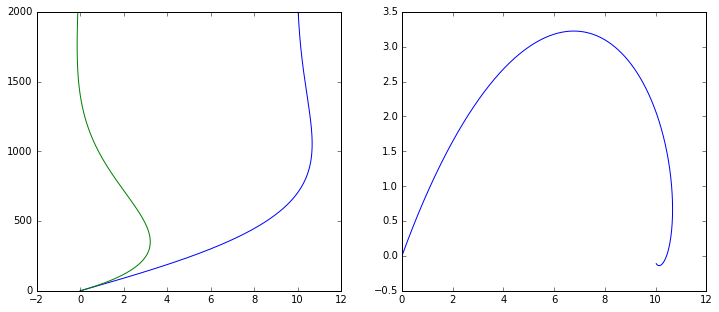

In [64]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameters
ug = 10.; vg = 0.
f = 1e-4; K = 10.
gamma = np.sqrt(f/(2*K))

def uwind(ug,vg,gamma,z):
    return ug - ug*np.exp(-gamma*z)*np.cos(gamma*z) - vg*np.exp(-gamma*z)*np.sin(gamma*z)

def vwind(ug,vg,gamma,z):
    return vg - vg*np.exp(-gamma*z)*np.cos(gamma*z) + ug*np.exp(-gamma*z)*np.sin(gamma*z)

z = np.arange(2001)
u = uwind(ug,vg,gamma,z)
v = vwind(ug,vg,gamma,z)


f,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(u,z,v,z)
ax[1].plot(u,v)
plt.show()

Alternatively, we may try to solve the system numerically. We can start with an initial assumption for the profile and iteratively solve for u and v. Let's keep K constant first and then try it with z-dependent K where we can use the fixed-K profile as initial guess.

The expressions for u and v with time dependency reitroduced, are:

$$ \frac{\partial u}{\partial t} = f(v-v_g)+\frac{\partial}{\partial z}\left[K \frac{\partial u}{\partial z} \right] $$
$$ \frac{\partial v}{\partial t} = -f(u-u_g)+\frac{\partial}{\partial z}\left[K \frac{\partial v}{\partial z} \right] $$

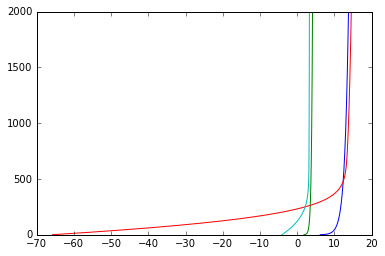

In [103]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Defining functions
def uwind(f,v,vg,K,u,dt):
    coriolis = f*(v-vg)
    d_u = np.gradient(u)
    d_uw = K*np.gradient(d_u)
    tendency = coriolis+d_uw
    new_u = u + tendency*dt
    return new_u

def vwind(f,u,ug,K,v,dt):
    coriolis = -f*(u-ug)
    d_v = np.gradient(v)
    d_vw = np.gradient(K*d_v)
    tendency = coriolis+d_vw
    new_v = v + tendency*dt
    return new_v

# Set parameters
ug = 10.; vg = 0.
f = 1e-4; K = 10.
dt = 0.1

z = np.arange(2000)+1
u = np.log(z/0.002)
v = 0.3*np.log(z/0.002)

plt.plot(u,z,v,z)

for i in range(20000):
  u = uwind(f,v,vg,K,u,dt)  
  v = vwind(f,u,ug,K,v,dt)
    
plt.plot(u,z,v,z)
    
plt.show()



## Realistic K-profile
The K-profile is not constant in reality. Rather, it has the form

$$ K(z) = \frac{\kappa u_* z}{1+\alpha \frac{z}{L}}\left(1-\frac{z}{h}\right)^2 $$

This looks like:

<function matplotlib.pyplot.show>

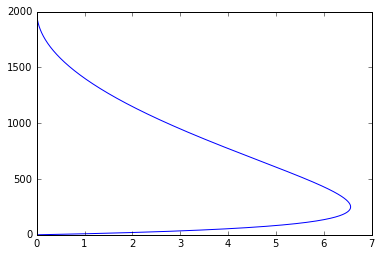

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def kprofile(z):
    '''
    Bert's notes
    '''
    kappa = 0.4 # Von Karman constant
    ust = 0.3 # just a guess
    alpha = 5. # stability function
    L = 500. # Obukhov length
    h = float(len(z))
    return kappa*ust*z/(1+alpha*z/L)*(1-z/h)**2

z = np.arange(2001)
K = kprofile(z)

plt.plot(K,z)
plt.show

In general, K varies with height and stability:

$$ K(z) = \frac{\kappa u_* z}{1+\alpha \frac{z}{L}}\left(1-\frac{z}{h}\right)^2 $$

where the Businger-Dyer function for stable stratification is recognizable in the denominator. Our aim is to find a z-averaged K-function that is still stability-dependent. As such, we seek to integrate

$$ \overline{K} =  \int_0^1 K\left(\frac{z}{h}\right) \, d\left(\frac{z}{h}\right) $$

which can be written as

$$ \overline{K} = \frac{\kappa u_*}{h} \int_0^1 \frac{x \left(1-x\right)^2}{1+\alpha \frac{h}{L}x} \, dx$$

with $x = z/h$. Expanding the numerator and defining $\alpha' = \alpha h/l$ gives

$$ \overline{K} = \frac{\kappa u_*}{h} \int_0^1 \frac{x^3-2x^2+x}{1+\alpha'x} \, dx$$

The integral in this equation can be solved by successive partial integration:

$$ 
\begin{align}
 & \int \frac{x^3-2x^2+x}{1+\alpha'x} \, dx \\
&= \frac{(x^3-2x^2+x)}{\alpha'} \ln(1+\alpha'x) - \int (3x^2-4x+1)(1+\alpha'x)^{-1} \,dx \\
&= \frac{(x^3-2x^2+x)}{\alpha'} \ln(1+\alpha'x) - \left[\frac{(3x^2-4x+1)}{\alpha'} \ln(1+\alpha'x) -\int (6x-4)(1+\alpha'x)^{-1} \,dx \right]\\
&= \frac{(x^3-2x^2+x)}{\alpha'} \ln(1+\alpha'x) - \left[\frac{(3x^2-4x+1)}{\alpha'} \ln(1+\alpha'x) - \left[\frac{(6x-4)}{\alpha'} \ln(1+\alpha'x) -\int 6(1+\alpha'x)^{-1} \,dx \right]\right]\\
&= \frac{(x^3-2x^2+x)}{\alpha'} \ln(1+\alpha'x) - \left[\frac{(3x^2-4x+1)}{\alpha'} \ln(1+\alpha'x) - \left[\frac{(6x-4)}{\alpha'} \ln(1+\alpha'x) - \frac{6}{\alpha'} \ln(1+\alpha'x)\right]\right]\\
&= \frac{x^3-5x^2+11x-11}{\alpha'} \ln(1+\alpha'x)
\end{align}
$$


integral value is -49914.0770194


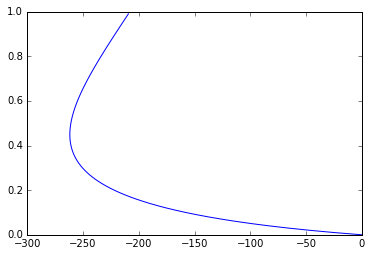

In [183]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def kmean(alpha,x):
    return 0.4*0.3*2000.*(x**3-5*x**2+11*x-11)/alpha*np.log(1+alpha*x)


h = 2000.
L = 800.
alpha = 4.7*h/L
z = np.arange(0,1,0.01)
ahh = kmean(alpha,z)

plt.plot(ahh,z)
plt.show

print 'integral value is',0.4*0.3*2000.*kmean(alpha,1.)-0.4*0.3*2000.*kmean(alpha,0.)
